## Importing all the required libraries

In [1]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
# loading the data from the csv files into the pandas dataframe
circuits = pd.read_csv('circuits.csv')
laptimes = pd.read_csv('lap_times.csv')
pitstops = pd.read_csv('pit_stops.csv')
seasons = pd.read_csv('seasons.csv',parse_dates=['year'])
status = pd.read_csv('status.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv',parse_dates=['year'])
constructor_results = pd.read_csv('constructor_results.csv')
results = pd.read_csv('results.csv')
qualifying = pd.read_csv('qualifying.csv')

## Analyzing the most successful constructors

In [3]:
# check the top 5 rows of the constructors dataframe
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [4]:
# check the top 5 rows of the results dataframe
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
# Merging the constructors dataframe with race results
merged_data = constructors.merge(results, on='constructorId', how='left')

In [6]:
merged_data.head()

,constructorId,constructorRef,name,nationality,url,resultId,raceId,driverId,number,grid,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1.0,18.0,1.0,22,1.0,...,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,5.0,18.0,5.0,23,3.0,...,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385,1.0
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,25.0,19.0,5.0,23,8.0,...,3.0,6.0,56.0,+38.450,5517005,19,7,1:35.922,208.031,1.0
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,27.0,19.0,1.0,22,9.0,...,5.0,4.0,56.0,+46.548,5525103,53,3,1:35.462,209.033,1.0
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,49.0,20.0,5.0,23,5.0,...,5.0,4.0,57.0,+26.789,5493759,49,1,1:33.193,209.062,1.0


In [7]:
# Extracting the required columns and grouping by constructor name, calculating the total races entered
constructor_stats = merged_data[['name', 'points', 'raceId']]
constructor_stats = constructor_stats.groupby('name')['raceId'].nunique().sort_values(ascending=False).reset_index(name='races')
constructor_stats = constructor_stats[constructor_stats['races'] >= 100]
# Displaying the top results
top_constructor_stats = constructor_stats.head()
top_constructor_stats

,name,races
0,Ferrari,1054
1,McLaren,883
2,Williams,797
3,Tyrrell,433
4,Renault,403


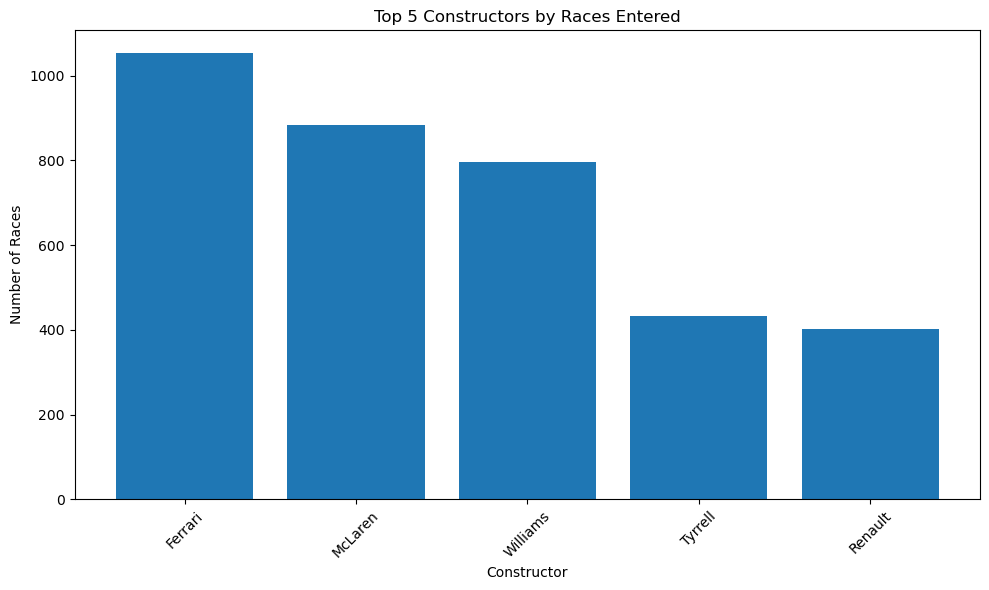

In [8]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_constructor_stats['name'], top_constructor_stats['races'])
plt.xlabel('Constructor')
plt.ylabel('Number of Races')
plt.title('Top 5 Constructors by Races Entered')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Display the chart
plt.tight_layout()
plt.show()

In [9]:
# Calculate average points per race for each racer
def calculate_points_per_race(df):
    total_points = df['points'].sum()
    total_races = df['raceId'].nunique()
    return total_points / total_races

filtered_data = merged_data[merged_data['name'].isin(constructor_stats.name)]
points_per_race_data = filtered_data.groupby('name').apply(calculate_points_per_race).sort_values(ascending=False).reset_index(name='avg_points_per_race')
top_10_racers = points_per_race_data.head(10)
top_10_racers


,name,avg_points_per_race
0,Mercedes,25.548487
1,Red Bull,18.235632
2,Ferrari,9.615057
3,McLaren,6.962061
4,Force India,5.179245
5,Williams,4.514429
6,Renault,4.409429
7,Benetton,3.313462
8,BRM,2.584135
9,Team Lotus,2.518987


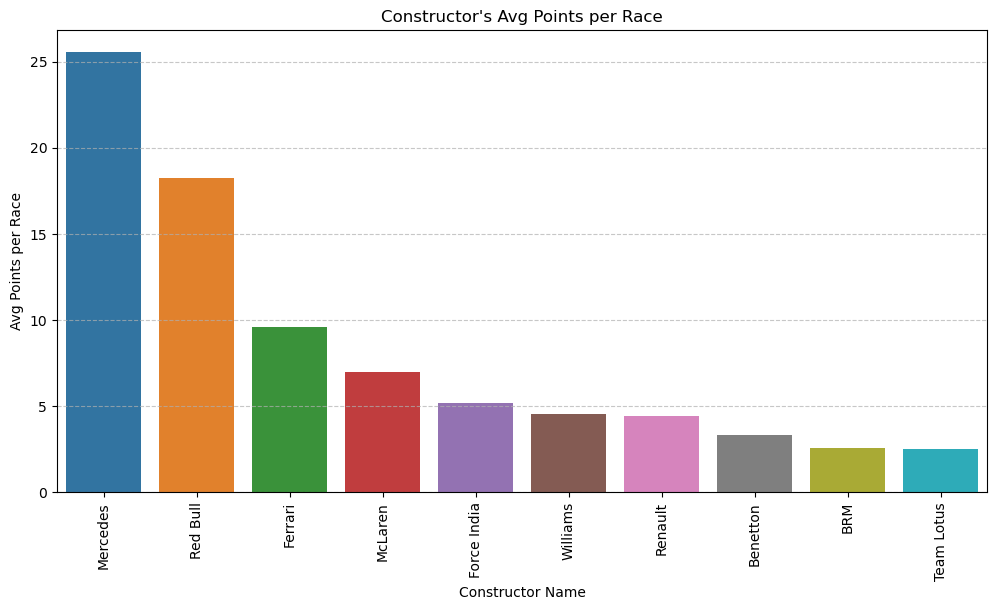

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_racers['name'], y=top_10_racers['avg_points_per_race'])
plt.title("Constructor's Avg Points per Race")
plt.xlabel("Constructor Name")
plt.ylabel("Avg Points per Race")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Do higher altitude circuits cause more engine failures?

In [11]:
# check the top 5 rows of the circuits dataframe
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [12]:
# check the top 5 rows of the races dataframe
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009-01-01,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009-01-01,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009-01-01,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009-01-01,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009-01-01,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [13]:
# check the top 5 rows of the status dataframe
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [14]:
# Merge circuits, races, results, and race status dataframes
merged_df = circuits.merge(races, how='left', left_on='circuitId', right_on='circuitId')
merged_df = merged_df.merge(results, how='left', on='raceId')
status_merged_df = merged_df.merge(status, how='inner', on='statusId')
status_merged_df.head()

,circuitId,circuitRef,name_x,location,country,lat,lng,alt,url_x,raceId,...,points,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,status
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,10.0,58.0,1:34:15.784,5655784,17,3,1:28.020,216.891,1.0,Finished
1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,8.0,58.0,+0.807,5656591,43,14,1:29.066,214.344,1.0,Finished
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,6.0,58.0,+1.604,5657388,50,10,1:28.916,214.706,1.0,Finished
3,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,5.0,58.0,+4.435,5660219,53,6,1:28.416,215.920,1.0,Finished
4,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,4.0,58.0,+4.879,5660663,53,9,1:28.712,215.199,1.0,Finished


In [15]:
# Cosmetic changes: Drop unnecessary columns and rename some
status_merged_df.drop(['name_y', 'url_y', 'url_x', 'time_y'], axis=1, inplace=True)
status_merged_df.rename(columns={'name_x': 'name', 'time_x': 'time'}, inplace=True)

# Select rows related to issues correlated with high altitudes and limit the years
altitude_issues = status_merged_df[status_merged_df['status'].isin(['Transmission', 'Engine', 'Overheating'])]
altitude_issues = altitude_issues[altitude_issues['year'] >= pd.to_datetime('2015-01-01')]

# Group by track name and altitude, and rename columns
altitude_counts = altitude_issues.groupby(['name', 'alt'])['status'].count().sort_values(ascending=False).reset_index().head(10)
altitude_counts.rename(columns={'status': 'engine_transmission_failures'}, inplace=True)
altitude_counts

,name,alt,engine_transmission_failures
0,Autódromo Hermanos Rodríguez,2227,8
1,Autodromo Nazionale di Monza,162,7
2,Red Bull Ring,678,6
3,Marina Bay Street Circuit,18,6
4,Albert Park Grand Prix Circuit,10,5
5,Bahrain International Circuit,7,5
6,Circuit de Spa-Francorchamps,401,4
7,Yas Marina Circuit,3,4
8,Circuit de Barcelona-Catalunya,109,3
9,Circuit of the Americas,161,3


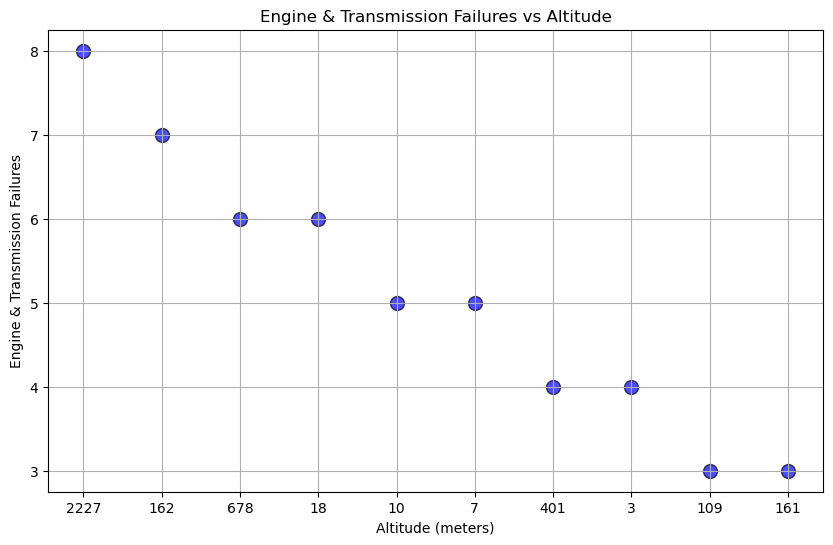

In [16]:
# Extract data for the scatter plot
x = altitude_counts['alt']
y = altitude_counts['engine_transmission_failures']
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=100, c='blue', alpha=0.7, edgecolors='k')
plt.title('Engine & Transmission Failures vs Altitude')
plt.xlabel('Altitude (meters)')
plt.ylabel('Engine & Transmission Failures')
plt.grid(True)
plt.show()

## Analyzing Historical Driver Nationality Distribution since 1950

In [17]:
# check the top 5 rows of the drivers dataframe
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


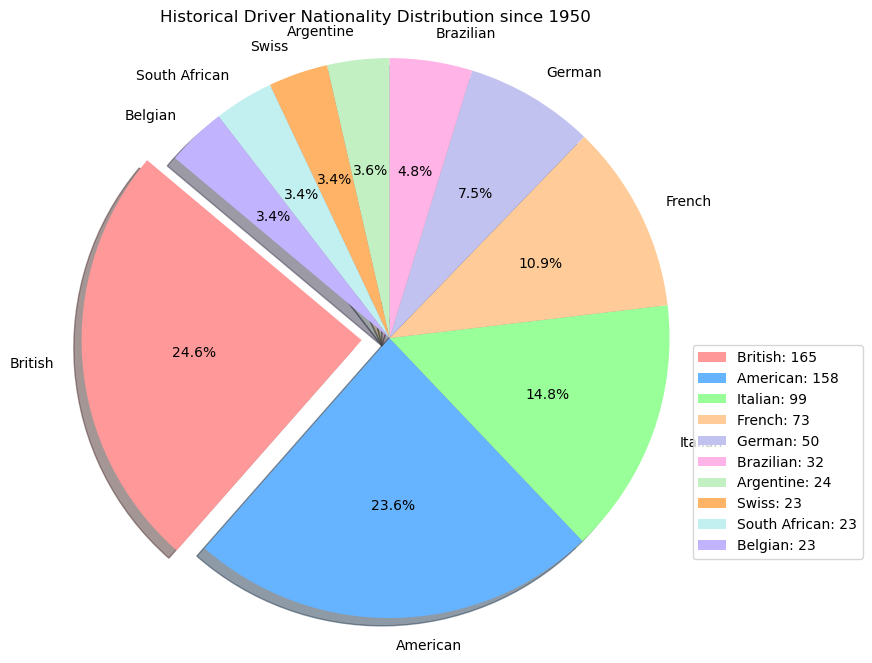

In [18]:
# Grouping by nationality, counting the driver
driver_nationality = drivers.groupby('nationality')['nationality'].count().sort_values(ascending=False).reset_index(name='number of drivers')
top_10_nationalities = driver_nationality.head(10)

# Define custom colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366', '#c2f0f0', '#c2b3ff']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_nationalities['number of drivers'], labels=top_10_nationalities['nationality'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
plt.title("Historical Driver Nationality Distribution since 1950")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with custom colors
legend_labels = [f'{nationality}: {count}' for nationality, count in zip(top_10_nationalities['nationality'], top_10_nationalities['number of drivers'])]
plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5))

# Show the pie chart
plt.show()

## Analyzing Distribution of Historic Champions by Nation

In [19]:
# check the top 5 rows of the driver_standings dataframe
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [20]:
# Merge drivers, driver standings, and race data
driver_position = drivers.merge(driver_standings, on='driverId', how='left')
driver_position = driver_position.merge(races, on='raceId', how='left')
driver_position.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url_x,driverStandingsId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


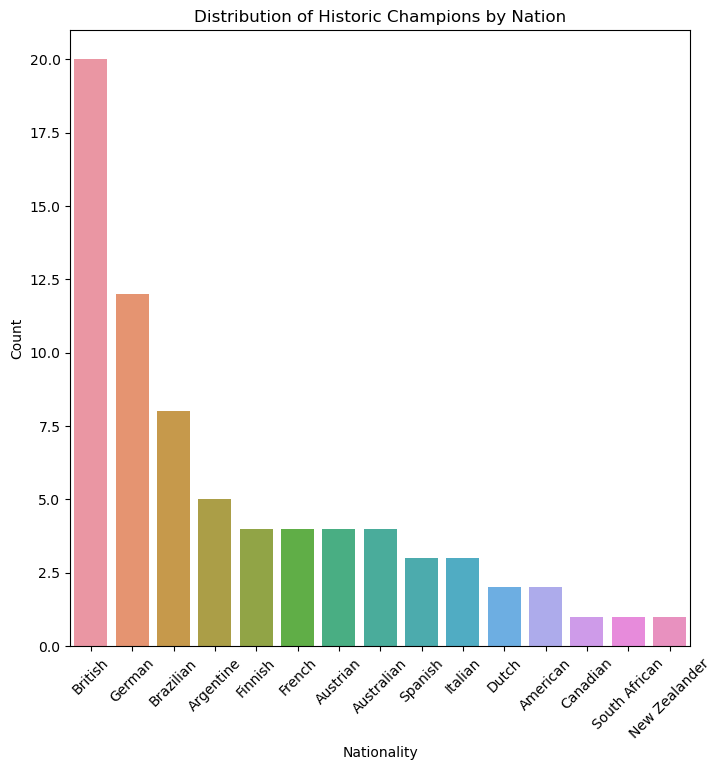

In [21]:
# Group by nationality, year, and surname to find max points achieved each season
champions = driver_position.groupby(['nationality', 'year', 'surname'])[['points', 'wins']].max()
champions = champions.sort_values('points', ascending=False).reset_index()
champions.drop_duplicates(subset=['year'], inplace=True)

# Count the number of times a nation ended in P1 and create a bar chart
champion_nations = champions['nationality'].value_counts().reset_index()
champion_nations.columns = ['Nationality', 'Count']

# Plotting the bar chart
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
sns.barplot(x='Nationality', y='Count', data=champion_nations)
plt.title("Distribution of Historic Champions by Nation")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Analyzing Champions-to-Drivers Ratio by Nationality

In [22]:
# check the top 5 rows of the driver_standings dataframe
driver_position.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url_x,driverStandingsId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


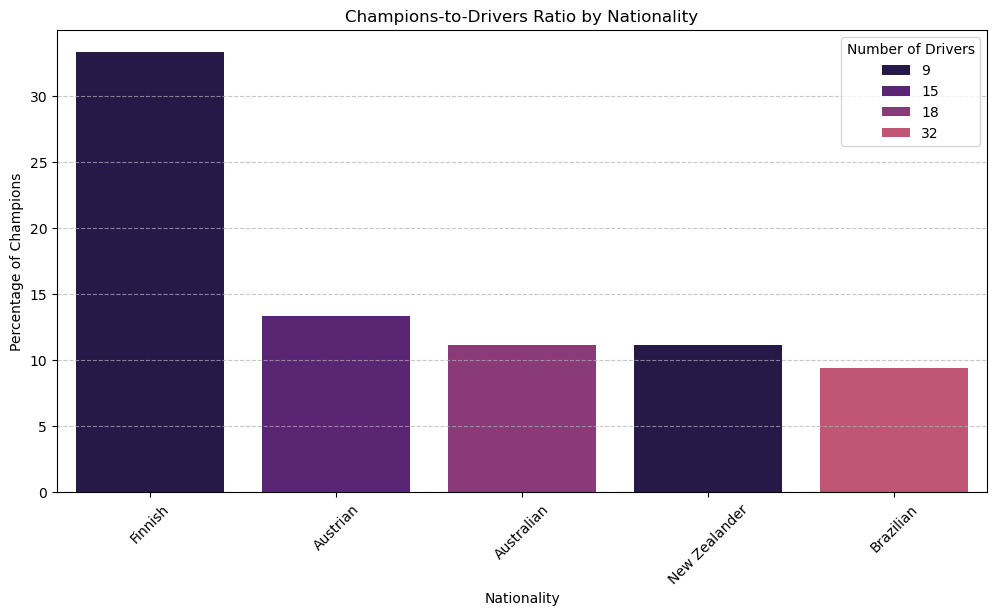

In [23]:
# Grouping by nationality, year, and surname to get the max points achieved every season and dropping year duplicates
champion_drivers = driver_position.groupby(['nationality', 'year', 'surname'])[['points', 'wins']].max()
champion_drivers = champion_drivers.sort_values('points', ascending=False).reset_index()
champion_drivers.drop_duplicates(subset=['year'], inplace=True)

# Grouping by nationality and counting the unique surnames of drivers
final = champion_drivers.groupby('nationality')['surname'].nunique().reset_index(name='champions')
final = final.sort_values(by='champions', ascending=False)

# Merging both datasets and calculating the ratio
ratios = final.merge(driver_nationality, on='nationality', how='inner')
ratios['perc_winners'] = (ratios.champions / ratios['number of drivers'] * 100).round(2)
ratios = ratios.sort_values('perc_winners', ascending=False).head(5)


plt.figure(figsize=(12, 6))
sns.set_palette("magma")  # You can choose a different palette
sns.barplot(data=ratios, x='nationality', y='perc_winners', hue='number of drivers', dodge=False)
plt.title("Champions-to-Drivers Ratio by Nationality")
plt.xlabel("Nationality")
plt.ylabel("Percentage of Champions")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Number of Drivers")
plt.show()

## Analyzing Most Wins by a Driver in a Single Season

In [24]:
# Merge driver data, their standings, and race data
merged_driver_data = drivers.merge(driver_standings, on='driverId', how='left')
merged_driver_data = merged_driver_data.merge(races, on='raceId', how='left')
merged_driver_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url_x,driverStandingsId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69.0,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


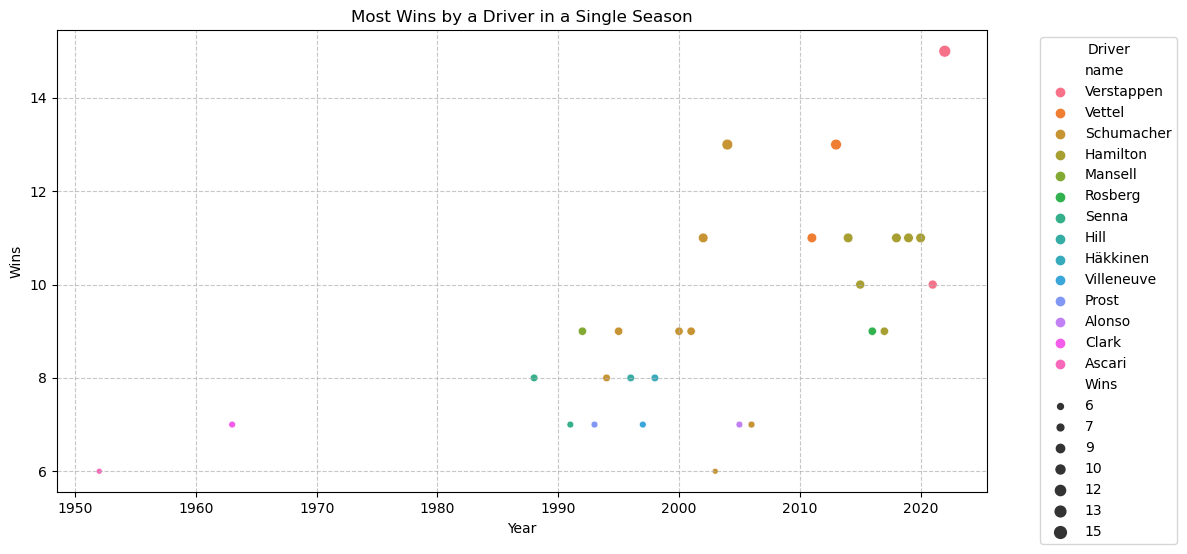

In [25]:
# Filter the dataset to include only when the position is 1, group by name and year, and extract the max wins
top_positions = merged_driver_data[merged_driver_data['position'] == 1].groupby(
    ['surname', 'year'])['wins'].max().sort_values(ascending=False).reset_index(name='Wins')
top_positions.head(20)

# Convert year to a numeric format
top_positions['year'] = top_positions['year'].dt.year

# Rename columns for clarity
top_positions.rename(columns={'surname': 'name'}, inplace=True)

# Convert Wins to int64
top_positions['Wins'] = top_positions['Wins'].astype('int64')

plt.figure(figsize=(12, 6))
sns.set_palette("husl")  # You can choose a different palette
sns.scatterplot(data=top_positions.head(30), x="year", y="Wins", hue="name", size="Wins")
plt.title("Most Wins by a Driver in a Single Season")
plt.xlabel("Year")
plt.ylabel("Wins")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title="Driver", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()